### Import packages

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import math

### Load data

In [58]:
path = '/Users/jooyong/github_locals/Soccer_Player_Recommendation_Service/data/match_details(from_Transfermarket)/Premier_league_match_details/'
file_list = os.listdir(path)

Premier_matches = pd.DataFrame()
for file in file_list:

    filepath = path + file
    Premier_matches = pd.concat([Premier_matches, pd.read_json(filepath, lines=True)], axis=0)

In [59]:
Premier_matches.head(5)

,match_general_info,team_details,event_details
0,"{'day': 'Sat', 'date': '8/14/10', 'starttime':...","{'home': {'name': 'Tottenham Hotspur', 'rank':...","{'home': {'sub': [{'subs_in': 'Robbie Keane', ..."
1,"{'day': 'Sat', 'date': '8/14/10', 'starttime':...","{'home': {'name': 'Aston Villa', 'rank': '3', ...",{'home': {'goal': [{'scorer': 'Stewart Downing...
2,"{'day': 'Sat', 'date': '8/14/10', 'starttime':...","{'home': {'name': 'Blackburn Rovers', 'rank': ...",{'home': {'goal': [{'scorer': 'Nikola Kalinic'...
3,"{'day': 'Sat', 'date': '8/14/10', 'starttime':...","{'home': {'name': 'Bolton Wanderers', 'rank': ...","{'home': {'card': [{'name': 'Fabrice Muamba', ..."
4,"{'day': 'Sat', 'date': '8/14/10', 'starttime':...","{'home': {'name': 'Sunderland AFC', 'rank': '7...","{'home': {'goal': [{'scorer': 'Darren Bent', '..."


In [60]:
print('number of matches from season 2010-2011 to the date the data scraped:', len(Premier_matches))

number of matches from season 2010-2011 to the date the data scraped: 4975


### Match general information analysis
#### 1. Observe initial form

In [61]:
match_general_info = pd.DataFrame(Premier_matches['match_general_info'].to_list())

In [62]:
match_general_info.head(5)

,day,date,starttime,stadium,attendance,referee,score
0,Sat,8/14/10,1:45 PM,White Hart Lane,35.928,Andre Marriner,0:0
1,Sat,8/14/10,4:00 PM,Villa Park,36.604,Mike Dean,3:0
2,Sat,8/14/10,4:00 PM,Ewood Park,25.869,Phil Dowd,1:0
3,Sat,8/14/10,4:00 PM,University of Bolton Stadium,20.352,Stuart Attwell,0:0
4,Sat,8/14/10,4:00 PM,Stadium of Light,38.390,Anthony Taylor,2:2


In [63]:
for column in match_general_info.columns:

    print(column, match_general_info[column].isnull().sum())


day 0
date 0
starttime 0
stadium 0
attendance 458
referee 0
score 0


Attendance data need to be observed after converting string type date to datetype date to check why there are many null values.

#### 2. Data pre-processing

In [64]:
def home_score(row):
    try:
        temp = row.split(':')
        home = int(temp[0])
    except:
        home = row
    return home
def away_score(row):
    try:
        temp = row.split(':')
        away = int(temp[1])
    except:
        away = row
    return away

match_general_info['home_score'] = match_general_info['score'].apply(lambda x: home_score(x))
match_general_info['away_score'] = match_general_info['score'].apply(lambda x: away_score(x))

match_general_info['date'] = pd.to_datetime(match_general_info['date'])
match_general_info['starttime'] = pd.to_datetime(match_general_info['starttime']).apply(lambda x: datetime.time(x))

In [65]:
match_general_info.head(5)

,day,date,starttime,stadium,attendance,referee,score,home_score,away_score
0,Sat,2010-08-14,13:45:00,White Hart Lane,35.928,Andre Marriner,0:0,0,0
1,Sat,2010-08-14,16:00:00,Villa Park,36.604,Mike Dean,3:0,3,0
2,Sat,2010-08-14,16:00:00,Ewood Park,25.869,Phil Dowd,1:0,1,0
3,Sat,2010-08-14,16:00:00,University of Bolton Stadium,20.352,Stuart Attwell,0:0,0,0
4,Sat,2010-08-14,16:00:00,Stadium of Light,38.390,Anthony Taylor,2:2,2,2


In [66]:
# cases having null value for attendance
match_general_info[match_general_info['attendance'].isnull()]

,day,date,starttime,stadium,attendance,referee,score,home_score,away_score
3697,Wed,2020-06-17,19:00:00,Villa Park,None,Michael Oliver,0:0,0,0
3698,Wed,2020-06-17,21:15:00,Etihad Stadium,None,Anthony Taylor,3:0,3,0
3709,Fri,2020-06-19,19:00:00,Carrow Road,None,Kevin Friend,0:3,0,3
3710,Fri,2020-06-19,21:15:00,Tottenham Hotspur Stadium,None,Jonathan Moss,1:1,1,1
3711,Sat,2020-06-20,13:30:00,Vicarage Road,None,Craig Pawson,1:1,1,1
...,...,...,...,...,...,...,...,...,...
4536,Sun,2022-05-08,15:00:00,Carrow Road,None,Robert Jones,0:4,0,4
4965,Fri,2023-09-01,21:00:00,Kenilworth Road,None,Paul Tierney,1:2,1,2
4971,Sat,2023-09-02,18:30:00,AMEX Stadium,None,Stuart Attwell,3:1,3,1
4972,Sun,2023-09-03,15:00:00,Selhurst Park,None,Robert Jones,3:2,3,2


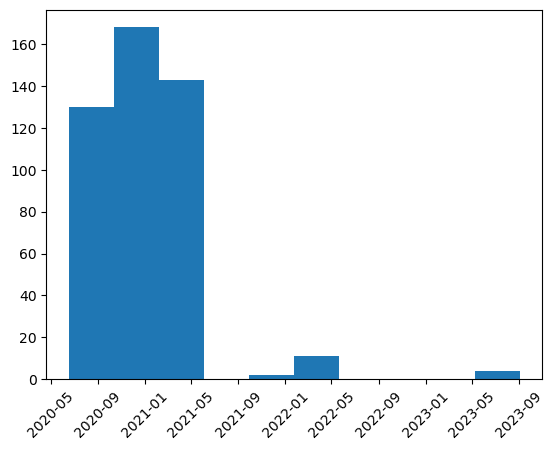

In [67]:
plt.hist(match_general_info[match_general_info['attendance'].isnull()]['date'])
plt.xticks(rotation = 45)
plt.show()

Most of null cases for the attendance locate season 2020-2021, and it could be because of the pendemic. <br>
There were many games with no attendance during the pendamic, so 0 will replace null values for attendance. <br>
For other cases, average number of attendance for the stadium will replace null values.

Null value attendance of matches bewtween 05.01.2020 and 07.01.2021 will be replaced with 0.

In [68]:
match_general_info.loc[(match_general_info['date']<='2021-07-01') & (match_general_info['date']>='2020-05-01'), 'attendance'] = \
    match_general_info[(match_general_info['date']<='2021-07-01') & (match_general_info['date']>='2020-05-01')]['attendance'].fillna('0')
match_general_info[match_general_info['attendance'].isnull()][['date', 'stadium']]

,date,stadium
4374,2021-12-29,Gtech Community Stadium
4404,2022-01-22,St Mary's Stadium
4413,2022-02-09,Carrow Road
4416,2022-02-09,Villa Park
4431,2022-02-19,Villa Park
4437,2022-02-20,Elland Road
4463,2022-03-13,St Mary's Stadium
4469,2022-03-18,Molineux Stadium
4490,2022-04-09,St Mary's Stadium
4506,2022-05-11,Molineux Stadium


In [69]:
# save indices for missing attendance samples to later check
attendance_missing_index = match_general_info[match_general_info['attendance'].isnull()].index

for stadium in set(match_general_info[match_general_info['attendance'].isnull()]['stadium']):

    average = pd.to_numeric(match_general_info[match_general_info['stadium']==stadium]['attendance'].dropna().apply(lambda x: x.replace('.', ''))).mean()
    if math.isnan(average)!=True:
        match_general_info.loc[match_general_info['stadium']==stadium,'attendance'] = match_general_info[match_general_info['stadium']==stadium]['attendance'].fillna(str(round(average)))
    
    else:
        print('cannot find an average, missing value filled out manually:', stadium)
        # max capacity of Kenilworth Road stadium is 11500, so I am going to use 10000.(because nothing left after drop null value)
        match_general_info.loc[match_general_info['stadium']==stadium,'attendance'] = match_general_info[match_general_info['stadium']==stadium]['attendance'].fillna(str(10000)) 

match_general_info['attendance'] = pd.to_numeric(match_general_info['attendance'].apply(lambda x: x.replace('.', ''))).apply(lambda x: round(x))

cannot find an average, missing value filled out manually: Kenilworth Road


In [70]:
# to check missing attendances are filled out or not
for one_index in attendance_missing_index:
    print(match_general_info.loc[one_index]['date'].date(), match_general_info.loc[one_index]['attendance'])

2021-12-29 16997
2022-01-22 27062
2022-02-09 25608
2022-02-09 32140
2022-02-19 32140
2022-02-20 24212
2022-03-13 27062
2022-03-18 24425
2022-04-09 27062
2022-05-11 24425
2022-04-30 27062
2022-05-07 16721
2022-05-08 25608
2023-09-01 10000
2023-09-02 24500
2023-09-03 21872
2023-09-03 44070


As we can see above, missing attendance of matches after 07.01.2021 (no pendamic period) are filled with averages.

In [71]:
for column in match_general_info.columns:
    print(column, match_general_info[column].isnull().sum())

day 0
date 0
starttime 0
stadium 0
attendance 0
referee 0
score 0
home_score 0
away_score 0


Now, we don't have null values anymore.

#### 3. Data Quality Check - Check if there are inappropriate values
##### - categorical data

In [72]:
match_general_info.describe(include=['object'])

,day,starttime,stadium,referee,score
count,4975,4975,4975,4975,4975
unique,7,31,44,39,54
top,Sat,16:00:00,Stamford Bridge,Michael Oliver,1:1
freq,2621,2086,250,350,531


In [73]:
match_general_info.describe(include=['datetime'], datetime_is_numeric=True)

,date
count,4975
mean,2017-01-23 12:07:40.221105664
min,2010-08-14 00:00:00
25%,2013-11-09 00:00:00
50%,2017-01-14 00:00:00
75%,2020-06-28 12:00:00
max,2023-09-03 00:00:00


In [74]:
match_general_info['day'].value_counts(dropna=False)

Sat    2621
Sun    1219
Wed     390
Mon     291
Tue     265
Thu      99
Fri      90
Name: day, dtype: int64

In [75]:
match_general_info['date'].value_counts(dropna=False)

2020-07-26    10
2015-12-26    10
2012-05-13    10
2021-05-23    10
2013-05-19    10
              ..
2015-12-14     1
2018-08-10     1
2020-12-30     1
2013-03-03     1
2013-09-15     1
Name: date, Length: 1422, dtype: int64

In [76]:
match_general_info['starttime'].value_counts(dropna=False)

16:00:00    2086
21:00:00     501
18:30:00     393
20:45:00     315
17:00:00     299
13:30:00     212
14:30:00     209
15:00:00     191
17:30:00     170
13:45:00     157
13:00:00      79
19:00:00      74
21:15:00      66
20:30:00      56
15:05:00      45
15:15:00      37
20:15:00      19
20:00:00      15
17:15:00      14
17:10:00      14
16:05:00       6
18:15:00       5
14:00:00       3
21:30:00       2
18:00:00       1
21:45:00       1
14:35:00       1
17:05:00       1
15:30:00       1
18:45:00       1
13:05:00       1
Name: starttime, dtype: int64

In [77]:
match_general_info['stadium'].value_counts(dropna=False)

Stamford Bridge                 250
Old Trafford                    249
Emirates Stadium                249
Goodison Park                   249
Anfield                         248
Etihad Stadium                  247
St James' Park                  230
St Mary's Stadium               209
Selhurst Park                   192
Villa Park                      191
King Power Stadium              171
The Hawthorns                   171
bet365 Stadium                  152
Turf Moor                       136
Craven Cottage                  134
Molineux Stadium                134
London Stadium                  134
White Hart Lane                 133
Swansea.com Stadium             133
Stadium of Light                133
AMEX Stadium                    117
Vitality Stadium                116
Vicarage Road                   114
Carrow Road                     113
Boleyn Ground                    95
Tottenham Hotspur Stadium        82
Loftus Road Stadium              57
DW Stadium                  

In [78]:
match_general_info['referee'].value_counts(dropna=False)

Michael Oliver       350
Anthony Taylor       346
Mike Dean            338
Martin Atkinson      333
Andre Marriner       305
Jonathan Moss        274
Kevin Friend         260
Craig Pawson         230
Lee Mason            228
Mark Clattenburg     174
Mike Jones           170
Stuart Attwell       165
Paul Tierney         159
Lee Probert          136
Neil Swarbrick       132
Phil Dowd            131
Chris Kavanagh       119
Howard Webb          119
Chris Foy            110
Graham Scott         101
Bobby Madley          94
David Coote           92
Roger East            90
Simon Hooper          79
Andrew Madley         73
Peter Bankes          63
Mark Halsey           60
Robert Jones          52
Darren England        46
Peter Walton          42
Jarred Gillett        27
John Brooks           26
Michael Salisbury     19
Thomas Bramall         9
Tony Harrington        9
Darren Bond            5
Tim Robinson           5
Keith Stroud           3
Josh Smith             1
Name: referee, dtype: int

##### - numerical data


In [79]:
match_general_info.describe()

,attendance,home_score,away_score
count,4975.000000,4975.000000,4975.000000
mean,33644.437789,1.541508,1.217688
std,18282.453812,1.314236,1.183525
min,0.000000,0.000000,0.000000
25%,23486.000000,1.000000,0.000000
50%,31578.000000,1.000000,1.000000
75%,44690.000000,2.000000,2.000000
max,83222.000000,9.000000,9.000000


### Match Team Details Analysis

In [81]:
team_details = pd.DataFrame(Premier_matches['team_details'].to_list())
home_team_details = pd.DataFrame(team_details['home'].to_list())
away_team_details = pd.DataFrame(team_details['away'].to_list())

In [87]:
home_team_details.head()

,name,rank,starting_line_up,substitutes,manager
0,Tottenham Hotspur,11,"[Heurelho Gomes, Michael Dawson, Ledley King, ...","[Carlo Cudicini, Sébastien Bassong, Younès Kab...",Harry Redknapp
1,Aston Villa,3,"[Brad Friedel, Ciaran Clark, Richard Dunne, St...","[Brad Guzan, Habib Bèye, Eric Lichaj, Nigel Re...",Kevin MacDonald
2,Blackburn Rovers,6,"[Paul Robinson, Christopher Samba, Ryan Nelsen...","[Mark Bunn, Pascal Chimbonda, Steven Nzonzi, K...",Sam Allardyce
3,Bolton Wanderers,13,"[Jussi Jääskeläinen, Gary Cahill, Zat Knight, ...","[Ádám Bogdán, Andrew O'Brien, Sam Ricketts, Ma...",Owen Coyle
4,Sunderland AFC,7,"[Simon Mignolet, John Mensah, Titus Bramble, K...","[Trevor Carson, Paulo da Silva, Phil Bardsley,...",Steve Bruce


In [88]:
away_team_details.head()

,name,rank,starting_line_up,substitutes,manager
0,Manchester City,12,"[Joe Hart, Vincent Kompany, Kolo Touré, Aleksa...","[Shay Given, Joleon Lescott, Pablo Zabaleta, P...",Roberto Mancini
1,West Ham United,17,"[Rob Green, Matthew Upson, Winston Reid, Hérit...","[Marek Stech, Danny Gabbidon, Jonathan Spector...",Avram Grant
2,Everton FC,16,"[Tim Howard, Sylvain Distin, Phil Jagielka, Le...","[Jan Mucha, Johnny Heitinga, Jack Rodwell, Ton...",David Moyes
3,Fulham FC,14,"[David Stockdale, Brede Hangeland, Aaron Hughe...","[Pascal Zuberbühler, Fredrik Stoor Siekkinen, ...",Mark Hughes
4,Birmingham City,8,"[Ben Foster, Roger Johnson, Scott Dann, Liam R...","[Maik Taylor, David Murphy, Stuart Parnaby, Cr...",Alex McLeish


In [167]:
for column in home_team_details.columns:

    print('home', column, home_team_details[column].isnull().sum())

for column in away_team_details.columns:

    print('away', column, away_team_details[column].isnull().sum())

home name 0
home rank 0
home starting_line_up 0
home substitutes 0
home manager 0
away name 0
away rank 0
away starting_line_up 0
away substitutes 0
away manager 0


In [172]:
concat_team_details = pd.concat([home_team_details, away_team_details], axis=0)

In [180]:
concat_team_details = concat_team_details.reset_index()

#### Name, rank and manager analysis

In [182]:
concat_team_details[['name', 'rank', 'manager']].describe()

,name,rank,manager
count,9950,9950,9950
unique,40,20,155
top,Tottenham Hotspur,11,David Moyes
freq,498,498,349


In [183]:
concat_team_details['name'].value_counts()

Tottenham Hotspur          498
Manchester United          498
Liverpool FC               497
Manchester City            497
Arsenal FC                 497
Everton FC                 497
Chelsea FC                 497
Newcastle United           460
West Ham United            459
Southampton FC             418
Crystal Palace             384
Aston Villa                384
West Bromwich Albion       342
Leicester City             342
Stoke City                 304
Fulham FC                  270
Wolverhampton Wanderers    269
Burnley FC                 269
Swansea City               266
Sunderland AFC             266
Brighton & Hove Albion     232
AFC Bournemouth            232
Watford FC                 228
Norwich City               227
Leeds United               114
Hull City                  114
Queens Park Rangers        114
Wigan Athletic             114
Sheffield United            80
Brentford FC                80
Cardiff City                76
Bolton Wanderers            76
Huddersf

In [184]:
team_rank_list = []
for team_name in set(concat_team_details['name'].values):
    
    team_rank_list.append(pd.concat([pd.Series({'name':team_name}), pd.to_numeric(concat_team_details[concat_team_details['name']==team_name]['rank']).describe()]))

team_rank_list_df = pd.DataFrame(team_rank_list)

In [185]:
team_rank_list_df.sort_values(by='mean')

,name,count,mean,std,min,25%,50%,75%,max
3,Manchester City,497.0,2.412475,1.656149,1.0,1.00,2.0,3.00,14.0
23,Manchester United,498.0,4.512048,2.949756,1.0,2.00,4.0,6.00,20.0
33,Chelsea FC,497.0,4.670020,3.730293,1.0,2.00,4.0,5.00,19.0
6,Tottenham Hotspur,498.0,5.285141,2.417870,1.0,4.00,5.0,6.00,16.0
7,Arsenal FC,497.0,5.334004,3.641870,1.0,3.00,5.0,6.00,20.0
28,Liverpool FC,497.0,5.362173,3.616385,1.0,2.00,5.0,7.00,19.0
24,Leicester City,342.0,9.628655,5.910337,1.0,3.00,9.0,14.00,20.0
34,Everton FC,497.0,10.207243,4.148371,1.0,7.00,10.0,13.00,20.0
38,Brentford FC,80.0,10.525000,2.903403,3.0,9.00,10.0,12.25,17.0
10,Brighton & Hove Albion,232.0,11.793103,4.211954,1.0,8.00,13.0,15.00,19.0


In [141]:
concat_team_details['manager'].value_counts()

David Moyes        174
Brendan Rodgers    155
Arsène Wenger      152
Jürgen Klopp       149
Sean Dyche         140
                  ... 
Graeme Jones         1
Steve Holland        1
Gary Megson          1
Leon Britton         1
Rob Edwards          1
Name: manager, Length: 147, dtype: int64

In [188]:
manager_rank_list = []
for manager_name in set(concat_team_details['manager'].values):
    
    manager_rank_list.append(pd.concat([pd.Series({'manager':manager_name}), pd.to_numeric(concat_team_details[concat_team_details['manager']==manager_name]['rank']).describe()]))

manager_rank_list_df = pd.DataFrame(manager_rank_list)

In [191]:
manager_rank_list_df.sort_values(by='mean').head(30)

,manager,count,mean,std,min,25%,50%,75%,max
150,Sir Alex Ferguson,114.0,1.789474,1.706177,1.0,1.00,1.0,2.00,16.0
39,Brian Kidd,2.0,2.000000,0.000000,2.0,2.00,2.0,2.00,2.0
154,Pep Guardiola,269.0,2.171004,1.677478,1.0,1.00,2.0,3.00,14.0
127,Roberto Mancini,112.0,2.660714,1.716657,1.0,2.00,2.0,4.00,12.0
123,Maurizio Sarri,38.0,3.657895,1.046908,1.0,3.00,4.0,4.00,6.0
82,Thomas Tuchel,62.0,3.774194,2.271847,1.0,3.00,3.0,4.00,12.0
151,Antonio Conte,132.0,3.833333,2.115615,1.0,3.00,4.0,5.00,14.0
81,Jürgen Klopp,299.0,4.020067,2.764759,1.0,2.00,3.0,6.00,16.0
51,Ange Postecoglou,4.0,4.500000,2.645751,2.0,2.75,4.0,5.75,8.0
7,Arsène Wenger,304.0,4.621711,3.052617,1.0,3.00,4.0,6.00,19.0


#### Starting lineup analysis

In [195]:
concat_team_details['starting_line_up'].describe()

count                                                  9950
unique                                                 8800
top       [Thibaut Courtois, Gary Cahill, David Luiz, Cé...
freq                                                     13
Name: starting_line_up, dtype: object

In [204]:
players_start_lineup = []
for line_up in concat_team_details['starting_line_up']:

    for player in line_up:

        players_start_lineup.append(player)

players_start_lineup_df = pd.DataFrame({'player_name': players_start_lineup})       

In [205]:
len(players_start_lineup_df)

109450

In [206]:
players_start_lineup_df.describe()

,player_name
count,109450
unique,2068
top,David de Gea
freq,415


In [215]:
players_start_lineup_df.value_counts().head(60)

player_name      
David de Gea         415
Hugo Lloris          361
Kyle Walker          350
Ben Foster           349
Lukasz Fabianski     338
Jordan Henderson     338
César Azpilicueta    327
Seamus Coleman       315
Harry Kane           302
Raheem Sterling      297
Jonny Evans          290
Mark Noble           280
David Silva          280
Wilfried Zaha        278
Gary Cahill          276
Kasper Schmeichel    276
Aaron Cresswell      273
Joel Ward            273
Ashley Westwood      267
James Ward-Prowse    266
Jamie Vardy          266
Jack Cork            262
Ryan Shawcross       260
Petr Cech            258
Gylfi Sigurdsson     257
James McArthur       256
Craig Dawson         255
Eric Dier            255
Joe Hart             254
Ben Mee              254
Ryan Bertrand        254
Leighton Baines      251
Jordan Pickford      251
Moussa Sissoko       247
Cheikhou Kouyaté     245
Laurent Koscielny    245
Simon Mignolet       244
Christian Eriksen    243
Andrew Robertson     240
Phil Ja

#### Match events analysis

In [248]:
home_subs_list = []
for i in Premier_matches['event_details'].apply(lambda x: x['home']).to_list():

    if 'sub' in list(i.keys()):
        
        for one_sub in i['sub']:

            home_subs_list.append(one_sub)


away_subs_list = []
for i in Premier_matches['event_details'].apply(lambda x: x['away']).to_list():

    if 'sub' in list(i.keys()):
        
        for one_sub in i['sub']:

            away_subs_list.append(one_sub)

concat_subs_df = pd.concat([pd.DataFrame(home_subs_list), pd.DataFrame(away_subs_list)]).reset_index()

In [258]:
# null values of subs_in could be nobody replace subs out player.
for column in concat_subs_df.columns:
    print(column, concat_subs_df[column].isnull().sum())

index 0
subs_in 25
subs_out 0
subs_out_reason 0
time 0


In [254]:
concat_subs_df[['subs_in', 'subs_out', 'subs_out_reason']].describe()

,subs_in,subs_out,subs_out_reason
count,28310,28335,28335
unique,2161,1837,9
top,James Milner,David Silva,Tactical
freq,153,136,14574


In [259]:
concat_subs_df['time'].describe()

count    28335.000000
mean        70.584048
std         15.146628
min          3.000000
25%         63.000000
50%         73.000000
75%         82.000000
max         97.000000
Name: time, dtype: float64

In [261]:
concat_subs_df['subs_in'].value_counts().head(50)

James Milner               153
Shane Long                 124
Alex Oxlade-Chamberlain    121
Danny Welbeck              117
Kelechi Iheanacho          116
Olivier Giroud             103
Marc Albrighton            100
Jay Rodríguez               96
Adama Traoré                95
Theo Walcott                93
Demarai Gray                91
Andy Carroll                90
Peter Crouch                85
Erik Lamela                 82
Dwight Gayle                81
James Ward-Prowse           80
Willian                     79
Lys Mousset                 78
Chicharito                  78
Adam Lallana                78
Divock Origi                73
Daniel Sturridge            71
Christian Benteke           70
Jacob Murphy                70
Matej Vydra                 69
Jeffrey Schlupp             68
Aaron Lennon                68
Lucas Moura                 67
Ruben Loftus-Cheek          67
James McArthur              67
Ross Barkley                66
Hal Robson-Kanu             66
Glenn Mu

In [262]:
concat_subs_df['subs_out'].value_counts().head(50)

David Silva                136
Theo Walcott               135
Juan Mata                  132
Sergio Agüero              131
Willian                    125
Adam Lallana               117
Heung-min Son              117
Roberto Firmino            114
Raheem Sterling            106
Riyad Mahrez               105
Danny Welbeck              104
Marc Albrighton            103
Eden Hazard                 96
Aaron Lennon                96
Alex Oxlade-Chamberlain     93
Shane Long                  93
Mousa Dembélé               93
James McArthur              92
Philippe Coutinho           92
Alex Iwobi                  91
Gylfi Sigurdsson            90
Ayoze Pérez                 90
Danny Ings                  90
Sadio Mané                  89
Ross Barkley                89
Wayne Routledge             89
Marcus Rashford             88
Mark Noble                  83
Jordan Ayew                 83
Jordan Henderson            83
Michail Antonio             81
Jesse Lingard               80
Anthony 

In [268]:
home_cards_list = []
for i in Premier_matches['event_details'].apply(lambda x: x['home']).to_list():

    if 'card' in list(i.keys()):
        
        for one_cards in i['card']:

            home_cards_list.append(one_cards)


away_cards_list = []
for i in Premier_matches['event_details'].apply(lambda x: x['away']).to_list():

    if 'card' in list(i.keys()):
        
        for one_cards in i['card']:

            away_cards_list.append(one_cards)

concat_cards_df = pd.concat([pd.DataFrame(home_cards_list), pd.DataFrame(away_cards_list)]).reset_index()

In [270]:
# null value of reasons -> reason not specified.
for column in concat_cards_df.columns:
    print(column, concat_cards_df[column].isnull().sum())

index 0
name 0
card_type 0
reason 2664
time 0


In [272]:
concat_cards_df[['name', 'card_type', 'reason']].describe()

,name,card_type,reason
count,16956,16956,14292
unique,1703,4,16
top,Gareth Barry,Yellow card,Foul
freq,65,16221,11631


In [273]:
concat_cards_df['time'].describe()

count    16956.000000
mean        58.858516
std         24.276399
min          1.000000
25%         40.000000
50%         61.000000
75%         80.000000
max         97.000000
Name: time, dtype: float64

In [275]:
concat_cards_df['name'].value_counts().head(50)

Gareth Barry           65
Oriol Romeu            63
Mark Noble             63
Ashley Young           58
Phil Bardsley          58
James Milner           57
Pablo Zabaleta         56
Fernandinho            56
Granit Xhaka           56
Luke Shaw              55
Lee Cattermole         55
Danny Rose             55
Ciaran Clark           54
Jonjo Shelvey          54
Charlie Adam           54
Jonny Evans            53
Cheik Tioté            52
Wilfried Zaha          52
Branislav Ivanovic     52
Vincent Kompany        52
Ashley Westwood        52
Kyle Walker            52
Ryan Shawcross         52
James McArthur         51
James Tomkins          51
Craig Dawson           50
Harry Maguire          50
Abdoulaye Doucouré     50
Moussa Sissoko         48
James McCarthy         47
Nemanja Matic          46
Craig Gardner          46
Joel Ward              46
James Tarkowski        46
Chris Brunt            46
David Luiz             45
Luka Milivojevic       45
James Ward-Prowse      45
Rúben Neves 

In [276]:
# 1 Yellow card -> Yellow card
concat_cards_df['card_type'].value_counts().head(50)

Yellow card      16221
Red card           300
Second yellow      271
1 Yellow card      164
Name: card_type, dtype: int64